# To do
- sort data by magnitude of residuals to investigate model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(font_scale=1.5, style='whitegrid')
pd.set_option('display.max_colwidth', 200) #needed to see long urls

In [2]:
demographics = pd.read_csv('county_complete.csv')
demographics = demographics[['fips', 'pop_2019', 'density_2010', 'private_nonfarm_employment_2009', 'percent_change_private_nonfarm_employment_2009']]
demographics.rename({'fips': 'county_fips'}, axis=1, inplace=True)
demographics.county_fips = demographics.county_fips.apply(
    lambda x: x if len(str(x))==5 else '0'+str(x)).astype('str')
demographics.head()

,county_fips,pop_2019,density_2010,private_nonfarm_employment_2009,percent_change_private_nonfarm_employment_2009
0,01001,55380,91.8,10628,16.6
1,01003,212830,114.6,52233,17.4
2,01005,25361,31.0,7990,-27.0
3,01007,22493,36.8,2927,-14.0
4,01009,57681,88.9,6968,-11.4


In [3]:
demographics.describe()

,pop_2019,density_2010,private_nonfarm_employment_2009,percent_change_private_nonfarm_employment_2009
count,3.142000e+03,3142.000000,3.142000e+03,3075.000000
mean,1.033411e+05,259.117059,3.566641e+04,0.544911
std,3.311701e+05,1724.395762,1.305082e+05,23.642111
min,6.600000e+01,0.000000,0.000000e+00,-83.200000
25%,1.095200e+04,16.900000,2.108500e+03,-12.000000
50%,2.573950e+04,45.150000,6.351500e+03,-2.000000
75%,6.786600e+04,113.550000,1.945575e+04,9.800000
max,1.008157e+07,69467.500000,3.703233e+06,386.500000


In [4]:
# zipstofips from https://github.com/bgruber/zip2fips
import json
  
# Opening JSON file
with open('zip2fips.json') as json_file:
    zip_to_fip = json.load(json_file)

In [5]:
fip_to_zip = {value:key for key, value in zip_to_fip.items()}

In [6]:
# data from https://data.ers.usda.gov/reports.aspx?ID=17828

hh_income_df = pd.read_csv('west_coast_unemployment_report.csv')
hh_income_df = hh_income_df[['fips1', 'name', 'Textbox20']]
hh_income_df.rename({hh_income_df.columns[0]:'county_fips', 
                     hh_income_df.columns[1]:'county_name', 
                     hh_income_df.columns[2]:'med_hh_income'}, inplace=True, axis=1)
hh_income_df.county_fips = hh_income_df.county_fips.apply(
    lambda x: x if len(str(x))==5 else '0'+str(x)).astype('str')
print(hh_income_df.shape)
hh_income_df.head()

(133, 3)


,county_fips,county_name,med_hh_income
0,06001,"Alameda County, CA","$107,589"
1,06003,"Alpine County, CA","$58,112"
2,06005,"Amador County, CA","$62,640"
3,06007,"Butte County, CA","$58,394"
4,06009,"Calaveras County, CA","$68,248"


In [7]:
df = pd.read_csv('apt_data_west_coast.csv')
df.head()

,address,city,state,zipcode,neighborhood,price,bdrms,baths,sq_ft,date,uniques,other_amenities,details,other_details,url,schools,transportation
0,923 Tamarack Ln,Sunnyvale,CA,94086.0,Ponderosa Park,"1,850 - $2,250",1 - 2 bd,1 ba,NaN,1961,"['Palmer College of Chiropractic West Campus', '15 min', '6.8 mi']","['Lawrence', '5 min', '1.7 mi']","['Sunnyvale', '9 min', '2.8 mi']","['San José International', '12 min', '4.7 mi']",https://www.apartments.com/tamarack-gardens-sunnyvale-ca/ljhvmtg/,"['Santa Clara University', '12 min', '4.3 mi']","['De Anza College', '14 min', '5.7 mi']"
1,17-25 Devonshire Blvd,San Carlos,CA,94070.0,San Carlos,"3,200",2 bd,2 ba,950 sq ft,1967,"['Menlo College', '16 min', '6.4 mi']","['San Carlos', '4 min', '1.3 mi']","['Belmont', '6 min', '2.4 mi']","['San Francisco International', '21 min', '13.3 mi']",https://www.apartments.com/17-25-devonshire-san-carlos-ca/gd9ndqw/,"['College of San Mateo', '12 min', '5.2 mi']","['Canada College', '15 min', '5.5 mi']"
2,3400 Vinton Ave,Los Angeles,CA,90034.0,Greater Culver City,NaN,NaN,NaN,NaN,1971,"['The Art Institute of California, Los Angeles', '9 min', '4.1 mi']","['Cable Available', 'Dishwashers', 'Easy Access To Freeways', 'Easy Access To Shopping', 'Fireplaces', 'Microwave Ovens', 'Tiled Kitchens']","['Laundry Facilities', 'Controlled Access', 'Maintenance on site', 'Maid Service', 'Elevator', 'Gated', 'Microwave']","['2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12', '18 units/2 stories']",https://www.apartments.com/chateau-parkside-apartments-los-angeles-ca/3x750wd/,"['West Los Angeles College', '7 min', '2.9 mi']","['Santa Monica College', '8 min', '2.9 mi']"
3,2148 Broderick St,San Francisco,CA,94115.0,Pacific Heights,"1,995",Studio bd,1 ba,204 sq ft,1895,"['Academy of Art University', '7 min', '2.5 mi']","['Cable Ready', 'Refrigerator', 'Window Coverings']",['Microwave'],['17 units/4 stories'],https://www.apartments.com/2148-broderick-san-francisco-ca/3tv57mf/,"['University of California, San Francisco', '3 min', '0.6 mi']","['University of San Francisco', '5 min', '1.4 mi']"
4,11118 Moorpark St,North Hollywood,CA,91602.0,North Hollywood,"1,695",Studio - 2 bd,1 - 1.5 ba,NaN,1964,"['Musicians Institute', '9 min', '5.2 mi']",[],"['Laundry Facilities', 'Pool', 'High Speed Internet Access', 'Smoke Free', 'Balcony']",['14 units/2 stories'],https://www.apartments.com/11118-moorpark-st-north-hollywood-ca/h912vr0/,"['New York Film Academy', '5 min', '2.3 mi']","['Valley College', '8 min', '4.2 mi']"


In [8]:
df.shape

(8200, 17)

# Clean and fix data types

### Cleaning assumptions
 - listings with multiple options can be split into two where one has the lowest of all values and one has the highest of all values

In [9]:
# print(f'Number with price range: {df.price.apply(lambda x: np.nan if "-" in str(x) else 1).isna().sum()}')
# print(f'Number without price range: {df.price.apply(lambda x: np.nan if "-" not in str(x) else 1).isna().sum()}')
# print(f'Number with bedroom range: {df.bdrms.apply(lambda x: np.nan if "-" in str(x) else 1).isna().sum()}')
# print(f'Number without bedroom range: {df.bdrms.apply(lambda x: np.nan if "-" not in str(x) else 1).isna().sum()}')
# print(f'Number with bathroom range: {df.baths.apply(lambda x: np.nan if "-" in str(x) else 1).isna().sum()}')
# print(f'Number without bathroom range: {df.baths.apply(lambda x: np.nan if "-" not in str(x) else 1).isna().sum()}')
# print(f'Number with sq. ft range: {df.sq_ft.apply(lambda x: np.nan if "-" in str(x) else 1).isna().sum()}')
# print(f'Number without sq. ft range: {df.sq_ft.apply(lambda x: np.nan if "-" not in str(x) else 1).isna().sum()}')

In [10]:
# # seperate out data that has a price range
# df_with_price_range = df[df.price.apply(lambda x: True if "-" in str(x) else False)]
# df_without_price_range = df[df.price.apply(lambda x: False if "-" in str(x) else True)]

# # for each value in df_without_price_range, return only the low end of the range by default
# df_without_price_range.loc[:,['bdrms','baths','sq_ft','date']] = df_without_price_range[[
#     'bdrms','baths','sq_ft','date']].applymap(lambda x: x if x!=x else (
#     x if '-' not in str(x) else str(x).split('-')[0]))

# # for data with a price range, make a high end and low end dataset by taking everything left of or right of a '-'
# df_high_end = df_with_price_range.copy()
# df_high_end[['price','bdrms','baths','sq_ft','date']] = df_high_end[['price','bdrms','baths','sq_ft','date']].applymap(lambda x: x if x!=x else (
#     x if '-' not in str(x) else str(x).split('-')[-1]))
# df_low_end = df_with_price_range.copy()
# df_low_end[['price','bdrms','baths','sq_ft','date']] = df_low_end[['price','bdrms','baths','sq_ft','date']].applymap(lambda x: x if x!=x else (
#     x if '-' not in str(x) else str(x).split('-')[0]))

# df_split = df_without_price_range.append([df_high_end, df_low_end], ignore_index=True)

# df_split.head()

In [11]:
# print(f'Number with price range: {df_split.price.apply(lambda x: np.nan if "-" in str(x) else 1).isna().sum()}')
# print(f'Number without price range: {df_split.price.apply(lambda x: np.nan if "-" not in str(x) else 1).isna().sum()}')
# print(f'Number with bedroom range: {df_split.bdrms.apply(lambda x: np.nan if "-" in str(x) else 1).isna().sum()}')
# print(f'Number without bedroom range: {df_split.bdrms.apply(lambda x: np.nan if "-" not in str(x) else 1).isna().sum()}')
# print(f'Number with bathroom range: {df_split.baths.apply(lambda x: np.nan if "-" in str(x) else 1).isna().sum()}')
# print(f'Number without bathroom range: {df_split.baths.apply(lambda x: np.nan if "-" not in str(x) else 1).isna().sum()}')
# print(f'Number with sq. ft range: {df_split.sq_ft.apply(lambda x: np.nan if "-" in str(x) else 1).isna().sum()}')
# print(f'Number without sq. ft range: {df_split.sq_ft.apply(lambda x: np.nan if "-" not in str(x) else 1).isna().sum()}')

In [12]:
import re
num_pat = re.compile('\d+')

def room_filter(x):
    if x != x:
        return x
    if 'Studio' in str(x):
        return 0
    else:
        return float(re.compile('[\d.]+').findall(str(x))[0])
    
def pet_filter(x):
    if type(x)==list:
        for i in x:
            if ('Pet' in i) or ('pet' in i):
                return True
    elif ('Pet' in str(x)) or ('pet' in str(x)):
        return True
    else:
        return False
    
def int_airport_filter(x):
    if type(x)==list:
        for i in x:
            if ('International' in i) or ('international' in i):
                return True
    elif ('International' in str(x)) or ('international' in str(x)):
        return True
    else:
        return False

def clean_data(df):
    
    df = df.copy()
    
    # seperate out data that has a price range
    df_with_price_range = df[df.price.apply(lambda x: True if "-" in str(x) else False)]
    df_without_price_range = df[df.price.apply(lambda x: False if "-" in str(x) else True)]

    # for each value in df_without_price_range, return only the low end of the range by default
    df_without_price_range.loc[:,['bdrms','baths','sq_ft','date']] = df_without_price_range[[
        'bdrms','baths','sq_ft','date']].applymap(lambda x: x if x!=x else (
        x if '-' not in str(x) else str(x).split('-')[0]))

    # for data with a price range, make a high end and low end dataset by taking everything left of or 
    # right of a '-'
    df_high_end = df_with_price_range.copy()
    df_high_end[['price','bdrms','baths','sq_ft','date']] = df_high_end[['price','bdrms','baths','sq_ft','date']].applymap(lambda x: x if x!=x else (
        x if '-' not in str(x) else str(x).split('-')[-1]))
    df_low_end = df_with_price_range
    df_low_end[['price','bdrms','baths','sq_ft','date']] = df_low_end[['price','bdrms','baths','sq_ft','date']].applymap(lambda x: x if x!=x else (
        x if '-' not in str(x) else str(x).split('-')[0]))

    df = df_without_price_range.append([df_high_end, df_low_end], ignore_index=True)

    # clean numeric columns and fix dtypes
    df['rent'] = df['price'].apply(lambda x: np.nan if x!=x else (
        np.nan if str(x)=='Call for Rent' else float(str(x).replace('$','').replace(',',''))))
    df['zip_region'] = df['zipcode'].apply(lambda x: 
                                           int(num_pat.findall(str(x))[0][1:3]) if num_pat.findall(str(x)) else np.nan)
    df['zip_sub_region'] = df['zipcode'].apply(lambda x: 
                                               int(num_pat.findall(str(x))[0][3:5]) if num_pat.findall(str(x)) else np.nan)
    df['full_address'] = df['address'] + df['city'] + ', ' + df['state']
    df['sq_ft'] = df['sq_ft'].apply(lambda x: np.nan if x!=x else float(str(x).split()[0].replace(',','')))
    df['date'] = df['date'].apply(lambda x: -1 if x!=x
                                        else (int(re.compile('\d+').findall(str(x))[0]) 
                                        if re.compile('\d+').findall(str(x))
                                        else -1))
    
    df.date = df.date.astype('int')
    df.date = df.date.apply(lambda x: np.nan if x==-1 else x)
    df['build_age'] = 2021 - df['date']
    df.bdrms = df.bdrms.apply(room_filter)
    df.baths = df.baths.apply(room_filter)
    df['log_rent'] = df.rent.apply(np.log10)
    df['ft'] = df.sq_ft.apply(np.sqrt)
    
    df.drop(['price'], axis=1, inplace=True)
    
    #add county fips column using zip_to_fips dictionary
    df['county_fips'] = df.zipcode.apply(
    lambda x: zip_to_fip[str(x)[:5]] if str(x)[:5] in zip_to_fip.keys() else np.nan)
    
    # add income column by merging on county fips
    df = df.merge(hh_income_df, on='county_fips', how='left')
    df = df.merge(demographics, on='county_fips', how='left')
    
    # make median income column a float dtype and add log median income column
    df.med_hh_income = df.med_hh_income.apply(
        lambda x: -1 if x!=x else float(str(x).replace('$', '').replace(',', ''))).astype('float')
    df.med_hh_income = df.med_hh_income.apply(lambda x: np.nan if x==-1 else x)
    df['log_med_hhi'] = df.med_hh_income.apply(np.log10)
    
    # remove nans in rent since these cannot be used to train or test
    df.dropna(subset=['rent'], inplace=True)
    
    # determine if pets are allowed
    df['pets_allowed1'] = df['uniques'].apply(pet_filter)
    df['pets_allowed2'] = df['other_amenities'].apply(pet_filter)
    df['pets_allowed3'] = df['details'].apply(pet_filter)
    df['pets_allowed4'] = df['other_details'].apply(pet_filter)
    df['pets_allowed'] = (df['pets_allowed1'] + df['pets_allowed2'] + 
                                df['pets_allowed3'] + df['pets_allowed4']).copy()
    df.drop(['pets_allowed1', 'pets_allowed2', 'pets_allowed3', 'pets_allowed4'], axis=1, inplace=True)
    df.pets_allowed = df['pets_allowed'].astype('int')
    
    # determine if there is a nearby int. airport
    df['int_airport1'] = df['uniques'].apply(int_airport_filter)
    df['int_airport2'] = df['other_amenities'].apply(int_airport_filter)
    df['int_airport3'] = df['details'].apply(int_airport_filter)
    df['int_airport4'] = df['other_details'].apply(int_airport_filter)
    df['int_airport'] = (df['int_airport1'] + df['int_airport2'] + 
                                df['int_airport3'] + df['int_airport4']).copy()
    df.drop(['int_airport1', 'int_airport2', 'int_airport3', 'int_airport4'], axis=1, inplace=True)
    df.int_airport = df['int_airport'].astype('int')
    
    df.rename({'pop_2019':'population', 'density_2010':'density', 'private_nonfarm_employment_2009':'priv_emp', 
               'percent_change_private_nonfarm_employment_2009':'priv_emp_%_change'}, axis=1, inplace=True)
    df['huge_apt'] = df.sq_ft.apply(lambda x: 1 if x>1999 else 0)
    df['la_county'] = df.county_fips.apply(lambda x: 1 if x=='06037' else 0)
    
    return df

df_clean = clean_data(df)
print(df_clean.dtypes)
df_clean.head()

/home/john/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)
/home/john/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


address               object
city                  object
state                 object
zipcode              float64
neighborhood          object
bdrms                float64
baths                float64
sq_ft                float64
date                 float64
uniques               object
other_amenities       object
details               object
other_details         object
url                   object
schools               object
transportation        object
rent                 float64
zip_region           float64
zip_sub_region       float64
full_address          object
build_age            float64
log_rent             float64
ft                   float64
county_fips           object
county_name           object
med_hh_income        float64
population           float64
density              float64
priv_emp             float64
priv_emp_%_change    float64
log_med_hhi          float64
pets_allowed           int64
int_airport            int64
huge_apt               int64
la_county     

,address,city,state,zipcode,neighborhood,bdrms,baths,sq_ft,date,uniques,...,med_hh_income,population,density,priv_emp,priv_emp_%_change,log_med_hhi,pets_allowed,int_airport,huge_apt,la_county
0,17-25 Devonshire Blvd,San Carlos,CA,94070.0,San Carlos,2.0,2.0,950.0,1967.0,"['Menlo College', '16 min', '6.4 mi']",...,135234.0,767423.0,1602.2,336120.0,-9.9,5.131086,0,1,0,0
2,2148 Broderick St,San Francisco,CA,94115.0,Pacific Heights,0.0,1.0,204.0,1895.0,"['Academy of Art University', '7 min', '2.5 mi']",...,121795.0,874961.0,17179.1,492689.0,-11.3,5.085629,0,0,0,0
3,11118 Moorpark St,North Hollywood,CA,91602.0,North Hollywood,0.0,1.0,NaN,1964.0,"['Musicians Institute', '9 min', '5.2 mi']",...,72721.0,10081570.0,2419.6,3703233.0,-4.2,4.861660,0,0,0,1
4,9337 National Blvd,Los Angeles,CA,90034.0,Cheviot Hills,2.0,2.0,900.0,1964.0,"['The Art Institute of California, Los Angeles', '10 min', '5.3 mi']",...,72721.0,10081570.0,2419.6,3703233.0,-4.2,4.861660,0,0,0,1
7,1119 E Elk Ave,Glendale,CA,91205.0,Mariposa,1.0,1.0,750.0,1961.0,"['Art Center College of Design', '14 min', '5.1 mi']",...,72721.0,10081570.0,2419.6,3703233.0,-4.2,4.861660,0,0,0,1


In [13]:
# drop the 2 craziest data points
print(df_clean.sort_values('rent', ascending=False)[['url','rent', 'address']].head(5))
df_clean = df_clean.drop(df_clean[df_clean.rent>90000].index, axis=0).sort_values('rent', ascending=False)
df_clean[['url','rent', 'address']].head(5)

                                                                                 url  \
7978                        https://www.apartments.com/west-edge-seattle-wa/w36yefj/   
2129  https://www.apartments.com/jb-test-of-marketing-titile-chula-vista-ca/npl28dp/   
8010                     https://www.apartments.com/the-bravern-bellevue-wa/r62km42/   
3847     https://www.apartments.com/the-landmark-los-angeles-los-angeles-ca/vq9hb8g/   
1905               https://www.apartments.com/122-rio-del-mar-blvd-aptos-ca/g6ns26x/   

          rent               address  
7978  115677.0          1430 2nd Ave  
2129  100000.0  1133 Thistlewood Ave  
8010   30585.0      688 110th Ave NE  
3847   30000.0   11750 Wilshire Blvd  
1905   29990.0  122 Rio Del Mar Blvd  


,url,rent,address
8010,https://www.apartments.com/the-bravern-bellevue-wa/r62km42/,30585.0,688 110th Ave NE
3847,https://www.apartments.com/the-landmark-los-angeles-los-angeles-ca/vq9hb8g/,30000.0,11750 Wilshire Blvd
1905,https://www.apartments.com/122-rio-del-mar-blvd-aptos-ca/g6ns26x/,29990.0,122 Rio Del Mar Blvd
3965,https://www.apartments.com/ten-thousand-los-angeles-ca/99nnsr7/,28600.0,10000 Santa Monica Blvd
6192,https://www.apartments.com/thea-at-metropolis-los-angeles-ca/77hmelw/,28560.0,1000 W 8th St


In [14]:
# fix typo in sq_ft
df_clean.sq_ft = df_clean.sq_ft.apply(lambda x: 1350 if x==13500 else x)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import linear_model

In [16]:
df_clean.columns

Index(['address', 'city', 'state', 'zipcode', 'neighborhood', 'bdrms', 'baths',
       'sq_ft', 'date', 'uniques', 'other_amenities', 'details',
       'other_details', 'url', 'schools', 'transportation', 'rent',
       'zip_region', 'zip_sub_region', 'full_address', 'build_age', 'log_rent',
       'ft', 'county_fips', 'county_name', 'med_hh_income', 'population',
       'density', 'priv_emp', 'priv_emp_%_change', 'log_med_hhi',
       'pets_allowed', 'int_airport', 'huge_apt', 'la_county'],
      dtype='object')

In [17]:
df_clean.county_fips.value_counts()

06037    2962
53033    1380
06085     805
06073     601
06001     578
         ... 
41033       1
41027       1
06039       1
53003       1
06109       1
Name: county_fips, Length: 82, dtype: int64

In [18]:
df_clean[(df_clean.med_hh_income==83576.0)].url

6334                                    https://www.apartments.com/luma-san-diego-ca/cn99d1e/
6422                                https://www.apartments.com/palisade-san-diego-ca/wj82s0l/
5014                           https://www.apartments.com/regents-court-san-diego-ca/2t5wjrb/
6480                              https://www.apartments.com/the-merian-san-diego-ca/sezlpc5/
4887                         https://www.apartments.com/vida-north-park-san-diego-ca/g1qmlcy/
                                                 ...                                         
8308                            https://www.apartments.com/pacific-cove-san-diego-ca/wkt2gsh/
1180                     https://www.apartments.com/maple-view-apartment-lakeside-ca/nqj1n7p/
8428             https://www.apartments.com/ocean-breeze-senior-village-oceanside-ca/m39pgbj/
5358     https://www.apartments.com/the-orchard-active-senior-living-55-san-diego-ca/09xfze2/
10333    https://www.apartments.com/the-orchard-active-senio

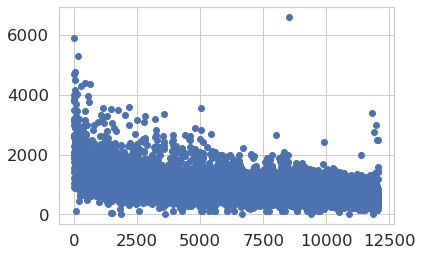

In [19]:
test = np.arange(0, len(df_clean))

plt.scatter(test, df_clean.sq_ft)

In [20]:
df_clean.columns

Index(['address', 'city', 'state', 'zipcode', 'neighborhood', 'bdrms', 'baths',
       'sq_ft', 'date', 'uniques', 'other_amenities', 'details',
       'other_details', 'url', 'schools', 'transportation', 'rent',
       'zip_region', 'zip_sub_region', 'full_address', 'build_age', 'log_rent',
       'ft', 'county_fips', 'county_name', 'med_hh_income', 'population',
       'density', 'priv_emp', 'priv_emp_%_change', 'log_med_hhi',
       'pets_allowed', 'int_airport', 'huge_apt', 'la_county'],
      dtype='object')

# Split data and pick features to include

In [21]:
# define X and y for modeling
# limit to la county
la_county_mask = (df_clean.county_fips=='06037')
target = 'rent'
y = df_clean[target].copy()
num_feats = ['sq_ft', 'build_age', 'med_hh_income', 'baths', 'density', 
             'priv_emp_%_change']
to_append = []

# for x in num_feats:
#     if x!='la_county':
#         df_clean[x+'*la_county'] = df_clean[x].values*df_clean.la_county
#         to_append.append(x+'*la_county')
# num_feats = num_feats + to_append

# num_feats = ['sq_ft', 'build_age', 'baths']
cat_feats = []
X = df_clean[num_feats + cat_feats].copy()
X = df_clean[num_feats + cat_feats +['state']].copy()
feats = num_feats + cat_feats

# split data stratified by state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17, stratify=X.state)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=170, stratify=X_train.state)
X_train.drop('state', axis=1, inplace=True)
X_train.reset_index(inplace=True, drop=True)
X_valid.drop('state', axis=1, inplace=True)
X_valid.reset_index(inplace=True, drop=True)
X_test.drop('state', axis=1, inplace=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_valid.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)
data = pd.concat([X_train, y_train], axis=1)

print('    train | valid | test')
print('X: ', X_train.shape, X_valid.shape, X_test.shape)
print('y: ', y_train.shape, y_valid.shape, y_test.shape)
X_train.reset_index(inplace=True, drop=True)
X_train.head()

    train | valid | test
X:  (7239, 6) (2413, 6) (2413, 6)
y:  (7239,) (2413,) (2413,)


/home/john/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,sq_ft,build_age,med_hh_income,baths,density,priv_emp_%_change
0,1056.0,31.0,NaN,2.0,NaN,NaN
1,1406.0,21.0,132444.0,2.5,1381.0,-14.9
2,653.0,13.0,72721.0,1.0,2419.6,-4.2
3,709.0,26.0,107589.0,1.0,2043.6,-11.4
4,1841.0,14.0,NaN,2.0,NaN,NaN


In [22]:
X_train.describe()

,sq_ft,build_age,med_hh_income,baths,density,priv_emp_%_change
count,7060.000000,6398.000000,6545.000000,7239.000000,6545.000000,5704.000000
mean,925.082720,31.634573,88352.767914,1.480004,1883.961054,-1.707959
std,462.415714,23.380125,20850.071573,0.618969,2662.623956,8.884353
min,1.000000,0.000000,45906.000000,0.500000,7.000000,-22.300000
25%,615.000000,11.000000,72721.000000,1.000000,735.800000,-5.800000
50%,825.000000,32.000000,80539.000000,1.000000,1465.200000,-4.200000
75%,1150.000000,48.000000,102338.000000,2.000000,2419.600000,5.900000
max,6600.000000,131.000000,135234.000000,6.500000,17179.100000,34.800000


# Handle Outliers

647
962


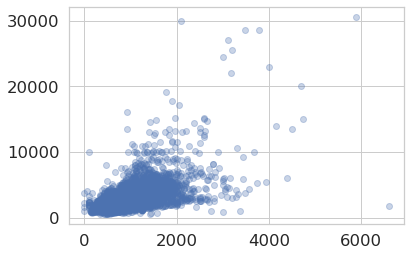

In [23]:
plt.scatter(X_train.sq_ft, y_train, alpha=0.3)

for i in range(2):
    crazy_outlier_ind = X_train.sq_ft.idxmax()
    print(crazy_outlier_ind)
    X_train.drop(crazy_outlier_ind, inplace=True, errors='ignore')
    y_train.drop(crazy_outlier_ind, inplace=True, errors='ignore')

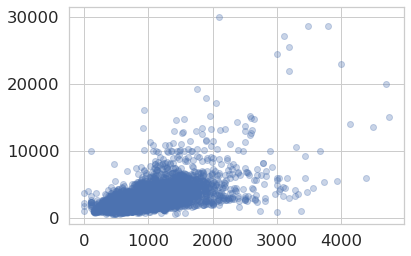

In [24]:
plt.scatter(X_train.sq_ft, y_train, alpha=0.3)

In [25]:
# data = pd.concat([X_train, y_train], axis=1)
# rent_iqr = df_clean.rent.quantile(0.75) - df_clean.rent.quantile(0.25)
# rent_outlier_cutoff = 1.5*rent_iqr+np.median(df_clean.rent)
# log_rent_outlier_cutoff = np.log10(rent_outlier_cutoff)
# print(f'monthly rent upper cutoff: {rent_outlier_cutoff}')
# print(f'Percent Removed: {100*(len(data)-len(data[rent_outlier_mask]))/len(data)}%')
# rent_outlier_mask = (data.log_rent<log_rent_outlier_cutoff)
# data[rent_outlier_mask].describe()

In [26]:
# plt.hist(data.log_rent, bins=16, range=(data.log_rent.min(), data.log_rent.max()))
# plt.hist(data[rent_outlier_mask].log_rent, bins=16, range=(data.log_rent.min(), data.log_rent.max()));

In [27]:
# data_no_out = data[rent_outlier_mask]
# data_no_out.head()

# Feature Selection

In [28]:
import matplotlib.colors as mcolors


def symmetrical_colormap(cmap_settings, new_name = None ):
    ''' This function take a colormap and create a new one, as the concatenation of itself by a symmetrical fold.
    '''
    # get the colormap
    cmap = plt.cm.get_cmap(*cmap_settings)
    if not new_name:
        new_name = "sym_"+cmap_settings[0]  # ex: 'sym_Blues'
    
    # this defined the roughness of the colormap, 128 fine
    n= 128 
    
    # get the list of color from colormap
    colors_r = cmap(np.linspace(0, 1, n))    # take the standard colormap # 'right-part'
    colors_l = colors_r[::-1]                # take the first list of color and flip the order # "left-part"

    # combine them and build a new colormap
    colors = np.vstack((colors_l, colors_r))
    mymap = mcolors.LinearSegmentedColormap.from_list(new_name, colors)

    return mymap
cmap_settings = ('viridis', None)  # provide int instead of None to "discretize/bin" the colormap
mymap = symmetrical_colormap(cmap_settings= cmap_settings, new_name =None )

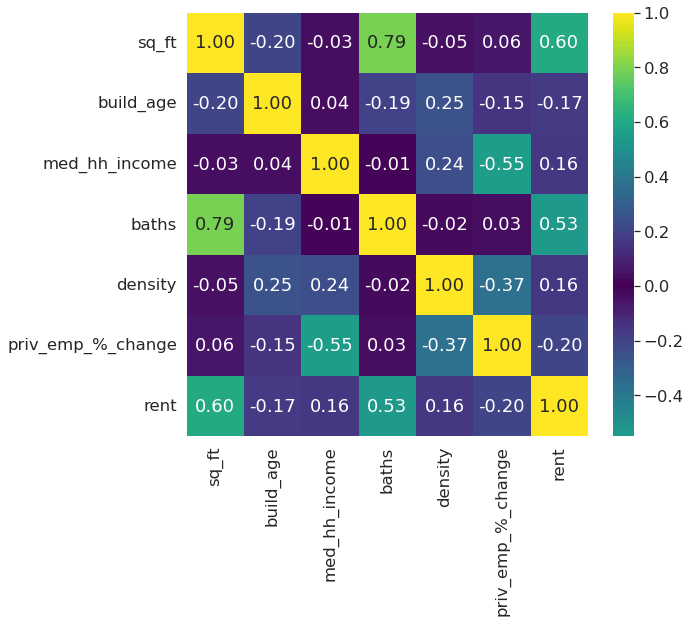

In [29]:
plt.figure(figsize=(10,9))
ax = sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap=mymap, center=0)
plt.tight_layout()
# plt.savefig('corr_heatmap.png', dpi=300)

In [30]:
data.head()

,sq_ft,build_age,med_hh_income,baths,density,priv_emp_%_change,rent
0,1056.0,31.0,NaN,2.0,NaN,NaN,1800.0
1,1406.0,21.0,132444.0,2.5,1381.0,-14.9,3246.0
2,653.0,13.0,72721.0,1.0,2419.6,-4.2,2510.0
3,709.0,26.0,107589.0,1.0,2043.6,-11.4,2316.0
4,1841.0,14.0,NaN,2.0,NaN,NaN,5602.0


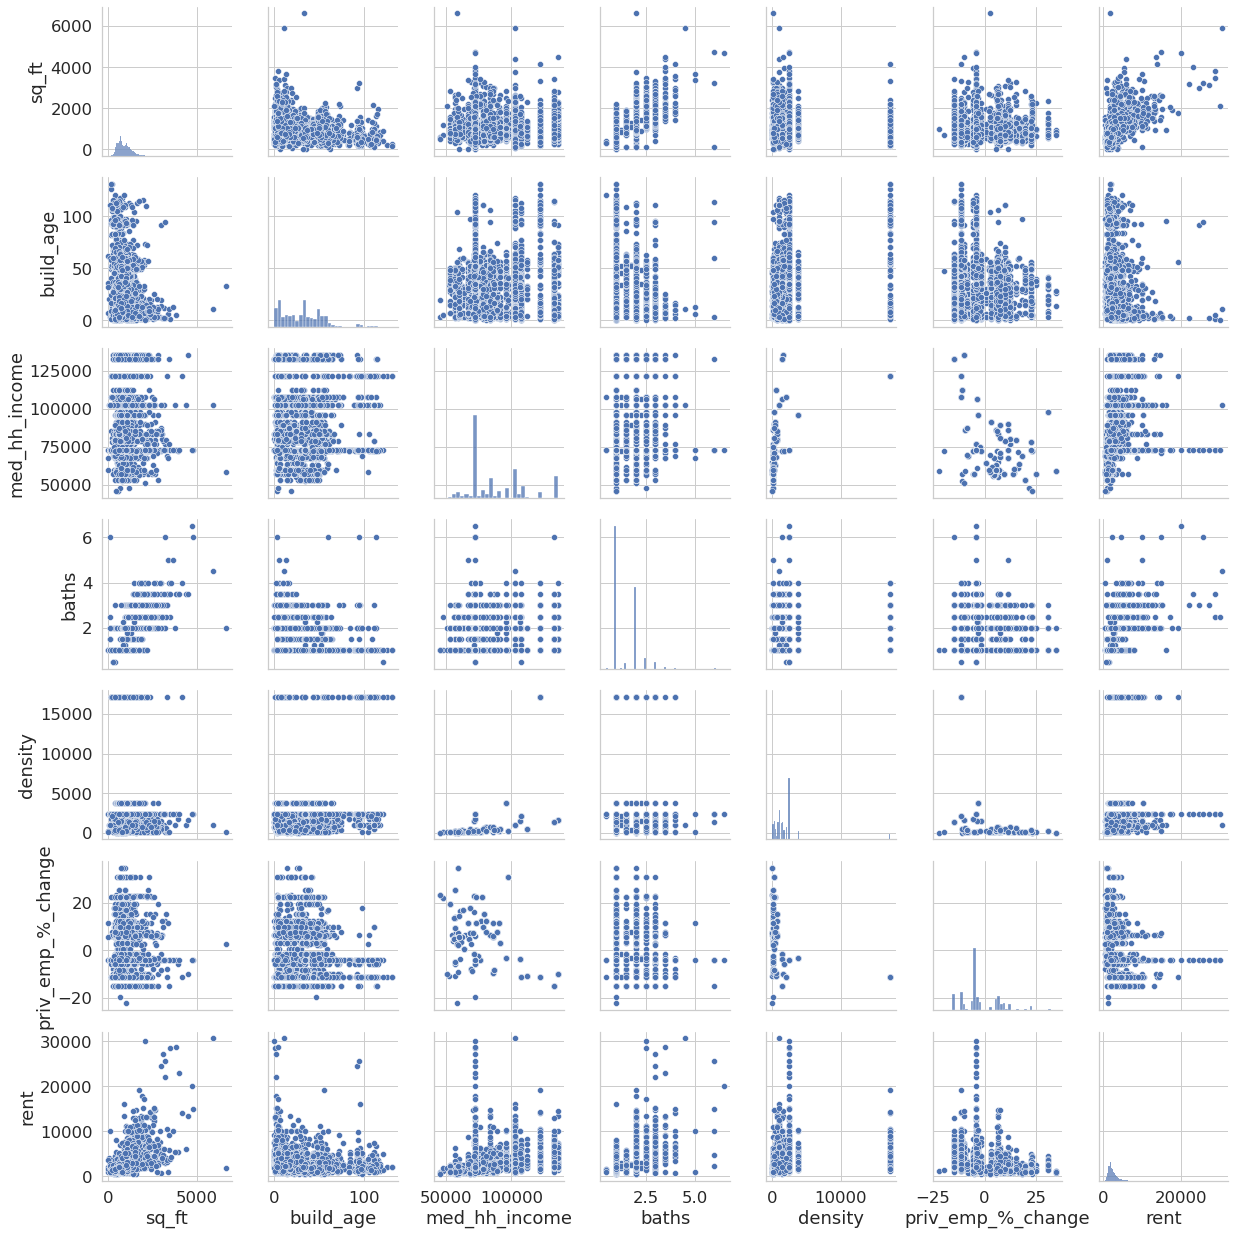

In [137]:
sns.pairplot(data, corner=False);
plt.tight_layout()
plt.savefig('apt_pairplot.png', dpi=300)

# Add Polynomial Features

In [32]:
# #Impute values to get rid of nans which crash Polynomial Features
# from sklearn.impute import SimpleImputer
# imp_median = SimpleImputer(strategy='median')
# imp_median.fit(X_train[num_feats])
# X_train_pre_poly = imp_median.transform(X_train[num_feats])
# X_valid_pre_poly = imp_median.transform(X_valid[num_feats])

# # get polynomial features
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(2)
# X_train_poly = poly.fit_transform(X_train_pre_poly)
# X_valid_poly = poly.transform(X_valid_pre_poly)

In [33]:
# poly_imp = SimpleImputer(strategy='median')
# poly_imp.fit(X_train_poly)

# poly_scaler = StandardScaler()
# poly_scaler.fit(X_train_poly)

# # poly_enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
# # poly_enc.fit(X_train[cat_feats]);

In [34]:
# def poly_preprocess(X_num=None, X_cat=None):
#     if X_num is not None:
#         #impute missing features using median
#         X_num = poly_imp.transform(X_num)

#         #scale numeric features
#         X_num = poly_scaler.transform(X_num)
        
#         X = X_num # X=X_num if no categorical data
    
#     if X_cat is not None:
#         #encode categorical features
#         X_cat = poly_enc.transform(X_cat)
        
#         X = X_cat # X=X_cat if no numeric data
    
#     if (X_num is not None) & (X_cat is not None):
#         X = np.concatenate([X_num, X_cat], axis=1)
    
#     return X

# X_train_poly = poly_preprocess(X_train_poly)
# X_valid_poly = poly_preprocess(X_valid_poly)
# X_train_poly.shape

In [35]:
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import Lasso
# # lm = LinearRegression()
# lm = Lasso(alpha=120.45, random_state=17)
# lm.fit(X_train_poly, y_train)
# lm.score(X_valid_poly, y_valid)

In [36]:
# alphas = np.logspace(-1, 4, 100)
# scores = []
# for i in alphas:
#     lm = Lasso(alpha=i, random_state=17)
#     lm.fit(X_train_poly, y_train)
#     scores.append(lm.score(X_valid_poly, y_valid))
# plt.figure(figsize=(10,6))
# plt.semilogx(alphas, scores)
# print('alpha : R^2')
# print(alphas[np.argmax(scores)], ':', max(scores))

In [37]:
# feat_dict = {}
# for i, x in enumerate(data.columns):
#     feat_dict['x'+str(i)] = x
# print(feat_dict)
# mapper = {}
# for i, x, in enumerate(poly.get_feature_names()):
#     mapper[i] = x
# for key, value in mapper.items():
#     for key2, value2 in feat_dict.items():
#         mapper[key] = mapper[key].replace(key2, value2)
# #         print(value.replace(key2, value2))
# print(mapper)
# data_poly = pd.DataFrame(X_train_poly)
# data_poly['y'] = np.array(y_train)
# data_poly.rename(mapper, axis=1, inplace=True)
# data_poly.head()

# # sns.pairplot(data_poly, corner=False);

In [38]:
# plt.figure(figsize=(10,9))
# ax = sns.heatmap(abs(data_poly.corr()), annot=False)

In [39]:
# data_poly.corr().y.sort_values(ascending=False)

In [40]:
# from statsmodels.regression.linear_model import OLS
# from statsmodels.api import add_constant
# model = OLS(y_train,add_constant(X_train_poly))
# fit = model.fit()
# fit.summary2()

# Preprocess Data

In [41]:
# # masks to select data
# X_train, y_train = data.drop('log_rent', axis=1), data.log_rent

In [42]:
# fit all preprocessers to training data
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer
imp_median = SimpleImputer(strategy='median')
imp_median.fit(X_train[num_feats])

scaler = StandardScaler()
scaler.fit(X_train[num_feats])

enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
enc.fit(X_train[cat_feats]);

pt_train = PowerTransformer(method='yeo-johnson', standardize=False)
pt_train.fit(X_train[num_feats]);

/home/john/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [43]:
X_train.head()

,sq_ft,build_age,med_hh_income,baths,density,priv_emp_%_change
0,1056.0,31.0,NaN,2.0,NaN,NaN
1,1406.0,21.0,132444.0,2.5,1381.0,-14.9
2,653.0,13.0,72721.0,1.0,2419.6,-4.2
3,709.0,26.0,107589.0,1.0,2043.6,-11.4
4,1841.0,14.0,NaN,2.0,NaN,NaN


In [44]:
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer

# num_pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy='median')),
#     ('std_scaler', StandardScaler())
# ])

# cat_pipeline = Pipeline(('one_hot_enc', OneHotEncoder(sparse=False, handle_unknown='ignore')))

# full_pipeline = ColumnTransformer([
#     ('num', num_pipeline, num_feats),
#     ('cat', cat_pipeline, cat_feats)
# ])

# X_train_pp = full_pipeline.fit_transform(X_train)

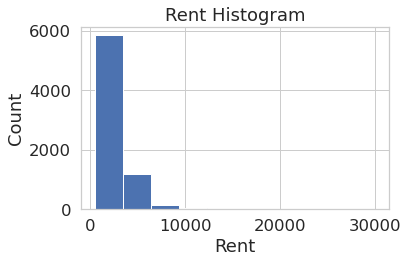

In [45]:
plt.hist(y_train)
plt.title('Rent Histogram')
plt.xlabel('Rent')
plt.ylabel('Count');
plt.tight_layout()
plt.savefig('rent_hist.png', dpi=300)

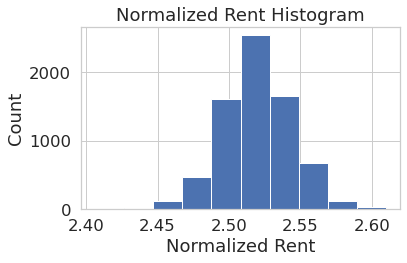

In [46]:
# use box-cox to make rent normally distributed
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox', standardize=False)
pt.fit(np.array(y_train).reshape(-1,1))
y_train_bc = pt.transform(np.array(y_train).reshape(-1,1))
y_valid_bc = pt.transform(np.array(y_valid).reshape(-1,1))
y_test_bc = pt.transform(np.array(y_test).reshape(-1,1))
# y_train_bc = power_transform(np.array(y_train).reshape(-1,1), method='box-cox')
lamb = pt.lambdas_[0]
y_train_bc
y_train
[(lamb*y+1)**(1/lamb) for y in y_train_bc]
plt.hist(y_train_bc)
y_train_bc = y_train_bc.flatten()
# [((y**lamb)-1)/lamb for y in y_train]
plt.title('Normalized Rent Histogram')
plt.xlabel('Normalized Rent')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('normalized_rent_hist.png', dpi=300)

In [47]:
def preprocess(X_num=None, X_cat=None, box_cox=False):
    if X_num is not None:
        #impute missing features using median
        X_num = imp_median.transform(X_num.values)

        #scale numeric features
        X_num = scaler.transform(X_num)
        
        #box-cox
        if box_cox:
            X_num = pt_train.transform(np.array(X_num))
        
        X = X_num # X=X_num if no categorical data
    
    if X_cat is not None:
        #encode categorical features
        X_cat = enc.transform(X_cat.values)
        
        X = X_cat # X=X_cat if no numeric data
    
    if (X_num is not None) & (X_cat is not None):
        X = np.concatenate([X_num, X_cat], axis=1)
    
    return X


# X_train_pp = preprocess(X_train[num_feats], X_train[cat_feats])
X_train_pp = preprocess(X_train[num_feats], box_cox=False)
X_test_pp = preprocess(X_test[num_feats], box_cox=False)
print(X_train_pp.shape)
print(y_train.shape)
# X_train_pp[:3]

(7237, 6)
(7237,)


(array([7.530e+02, 3.469e+03, 2.078e+03, 5.300e+02, 1.370e+02, 5.200e+01,
        2.200e+01, 1.000e+01, 3.000e+00, 4.000e+00]),
 array([1.0000e+00, 4.7590e+02, 9.5080e+02, 1.4257e+03, 1.9006e+03,
        2.3755e+03, 2.8504e+03, 3.3253e+03, 3.8002e+03, 4.2751e+03,
        4.7500e+03]),
 <BarContainer object of 10 artists>)

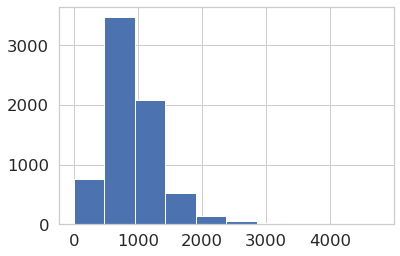

In [48]:
plt.hist(X_train['sq_ft'])

(array([7.530e+02, 3.648e+03, 2.078e+03, 5.300e+02, 1.370e+02, 5.200e+01,
        2.200e+01, 1.000e+01, 3.000e+00, 4.000e+00]),
 array([-2.03371226, -0.98684789,  0.06001648,  1.10688084,  2.15374521,
         3.20060958,  4.24747395,  5.29433832,  6.34120269,  7.38806706,
         8.43493143]),
 <BarContainer object of 10 artists>)

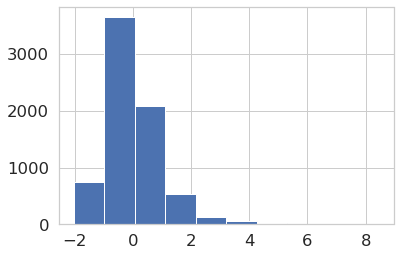

In [49]:
plt.hist(X_train_pp[:,0])

In [50]:
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import Lasso
# # lm = LinearRegression()
# lm = Lasso(alpha=75.64633275546291, random_state=17)
# lm.fit(X_train_poly, y_train)
# lm.score(X_valid_poly, y_valid)

In [51]:
# alphas = np.logspace(-1, 4, 100)
# scores = []
# for i in alphas:
#     lm = Lasso(alpha=i, random_state=17)
#     lm.fit(X_train_poly, y_train)
#     scores.append(lm.score(X_valid_poly, y_valid))
# plt.figure(figsize=(10,6))
# plt.semilogx(alphas, scores)
# print('alpha : R^2')
# print(alphas[np.argmax(scores)], ':', max(scores))

In [52]:
# # put preprocessed data back into a dataframe
# data_pp = pd.DataFrame(np.concatenate([X_train_pp, y_train], axis=-1))
# mapper = {}
# for i in range(len(X_train_pp[0])+1):
#     if i in range(len(num_feats)):
#         mapper[i] = num_feats[i]
#     elif i==len(X_train_pp[0]):
#         mapper[i] = 'y'
#     else:
#         mapper[i] = i
# data_pp.rename(mapper=mapper, inplace=True, axis=1)
# data_pp.head()

In [53]:
# X_valid_pp = preprocess(X_valid[num_feats], X_valid[cat_feats])
X_valid_pp = preprocess(X_valid[num_feats])

print(X_valid_pp.shape)

(2413, 6)


# Fit Model

0.00032745491628777284 : 0.4427839086879225


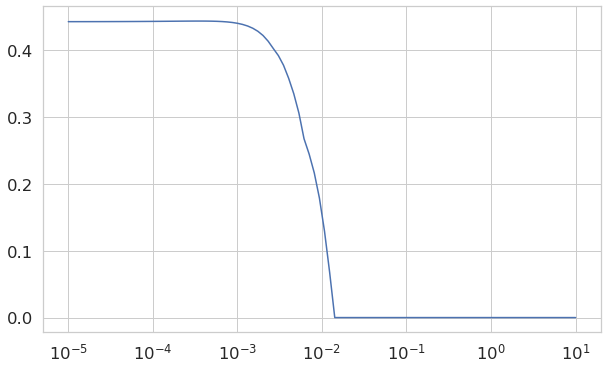

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

alphas = np.logspace(-5, 1, 100)
scores = []
for i in alphas:
    lm_test = Lasso(alpha=i, random_state=17)
    lm_test.fit(X_train_pp, y_train_bc)
    scores.append(lm_test.score(X_valid_pp, y_valid_bc))
plt.figure(figsize=(10,6))
plt.semilogx(alphas, scores)
print(alphas[np.argmax(scores)], ':', max(scores))
# plt.xlim([10**-5, 10**-3])

In [96]:
# lm = LinearRegression()
# lm = Lasso(alpha=44.306, random_state=17)
lm = Lasso(alpha=0.0003, random_state=17)
lm.fit(X_train_pp, y_train_bc)
lm.score(X_valid_pp, y_valid_bc)

0.4427682455133116

In [97]:
print(y_train.shape)
print(y_train_bc.shape)

(7234, 1)
(7234, 1)


.

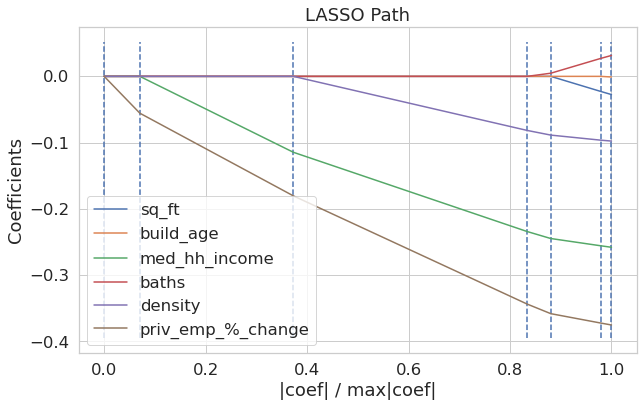

In [98]:
from sklearn.linear_model import lars_path
_, _, coefs = lars_path(X_train_pp, y_train_bc.flatten(), method='lasso', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,6))
plt.plot(xx, coefs.T, label=feats)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend()
plt.show()

In [99]:
print(f'Train R^2: {lm.score(X_train_pp, y_train_bc)}')
print(f'Valid R^2: {lm.score(X_valid_pp, y_valid_bc)}')

Train R^2: 0.5010625428345283
Valid R^2: 0.4427682455133116


In [100]:
from sklearn.model_selection import cross_val_score

train_cv_scores = cross_val_score(lm, X_train_pp, y_train_bc, cv=5)
# valid_cv_scores = cross_val_score(lm, X_valid_pp, y_valid, cv=10)
print(train_cv_scores)
# print(valid_cv_scores)

[0.51146094 0.49634442 0.50779097 0.51611902 0.46419676]


In [101]:
print("Train: %0.2f R^2 with a standard deviation of %0.2f" % (train_cv_scores.mean(), train_cv_scores.std()))
# print("Valid: %0.2f R^2 with a standard deviation of %0.2f" % (valid_cv_scores.mean(), valid_cv_scores.std()))

Train: 0.50 R^2 with a standard deviation of 0.02


In [102]:
X_valid_pp.shape

(2413, 6)

In [103]:
print(lamb)

-0.3751700267276901


In [133]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

preds = lm.predict(X_test_pp)
actuals = np.array(y_test_bc).flatten()
resids = preds-actuals

preds2 = np.array([(lamb*y+1)**(1/lamb) for y in lm.predict(X_test_pp)]).reshape((-1))
actuals2 = np.array([(lamb*y+1)**(1/lamb) for y in y_test_bc]).reshape((-1))
resids2 = preds2-actuals2

# print(actuals2)
# print(preds2)
# for i in range(len(preds2)):
#     if preds2[i]!=preds2[i]:
#         print('nan in preds2')
#     if actuals2[i]!=actuals2[i]:
#         print('nan in actuals2')

print(f'median rent: {(lamb*np.median(y_test_bc)+1)**(1/lamb)}')
print(f'rmse: {np.sqrt(mse(actuals2, preds2))}')
print(f'mae: {mae(actuals2, preds2)}')

median rent: 2294.9999999999964
rmse: 2431.4892985840856
mae: 772.8139932634784


In [105]:
X_valid_pp[317]
X_valid_pp[317]*scaler.var_+scaler.mean_

array([-1.75802987e+05,  1.80394150e+02, -3.22012326e+08,  1.18319260e+00,
       -4.20673736e+06,  2.11588632e+02])

In [106]:
print(max(preds2), actuals2[np.argmax(preds2)])
print(np.argmax(preds2))

89125.50651320399 8886.999999999887
1477


Text(0, 0.5, 'Residuals')

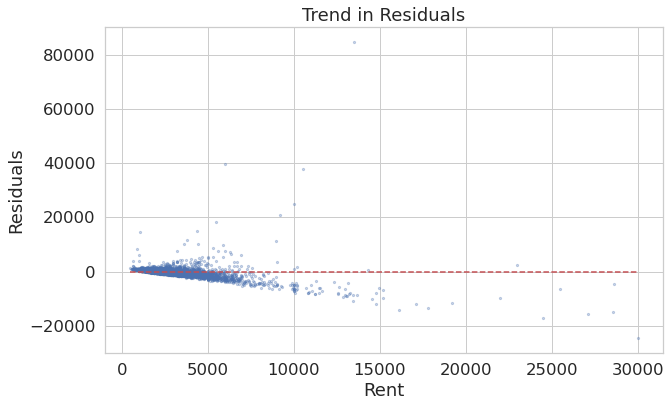

In [107]:
preds_t = lm.predict(X_train_pp)
actuals_t = np.array(y_train_bc).flatten()
resids_t = preds_t-actuals_t

preds2_t = np.array([(lamb*y+1)**(1/lamb) for y in lm.predict(X_train_pp)]).reshape((-1))
actuals2_t = np.array([(lamb*y+1)**(1/lamb) for y in y_train_bc]).reshape((-1))
resids2_t = preds2_t-actuals2_t


x = actuals2_t
y = resids2_t
plt.figure(figsize=(10,6))
plt.scatter(x, y, alpha=0.3, s=5)
plt.plot([min(x), max(x)],[0, 0], c='r', linestyle='--')
plt.title('Trend in Residuals')
plt.xlabel('Rent')
plt.ylabel('Residuals')
# plt.ylim([-5000,5000])
# plt.xlim([0,10000])

In [108]:
resids2_t.shape

(7234,)

In [109]:
# # plt.scatter(X_train.sq_ft, y_train, alpha=0.3)
# print(X_train_pp.shape)
# y_train = np.array(y_train)
# y_train= y_train.reshape(-1,1)
# y_train_bc = np.array(y_train_bc)
# y_train_bc= y_train_bc.reshape(-1,1)
# resids2_t = resids2_t.reshape(-1,1)
# for i in range(3):
#     crazy_outlier_ind = np.argmax(resids2_t)
#     print(crazy_outlier_ind)
#     X_train_pp = np.delete(X_train_pp, crazy_outlier_ind, axis=0)
#     y_train = np.delete(y_train, crazy_outlier_ind, axis=0)
#     y_train_bc = np.delete(y_train_bc, crazy_outlier_ind, axis=0)
#     resids2_t = np.delete(resids2_t, crazy_outlier_ind, axis=0)
# resids2_t = resids2_t.flatten()
# print(X_train_pp.shape)
# print(y_train.shape)

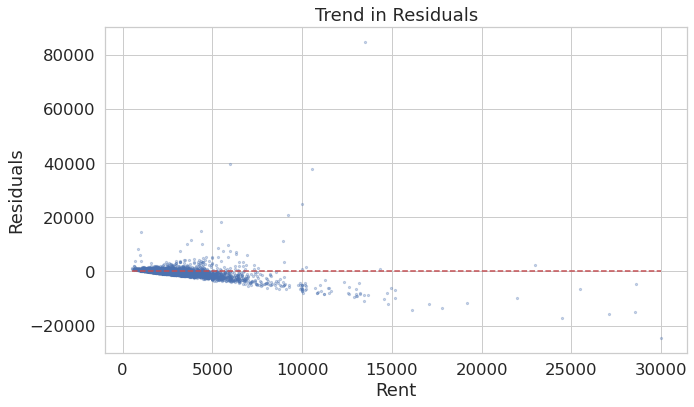

In [134]:
preds_t = lm.predict(X_train_pp)
actuals_t = np.array(y_train_bc).flatten()
resids_t = preds_t-actuals_t

preds2_t = np.array([(lamb*y+1)**(1/lamb) for y in lm.predict(X_train_pp)]).reshape((-1))
actuals2_t = np.array([(lamb*y+1)**(1/lamb) for y in y_train_bc]).reshape((-1))
resids2_t = preds2_t-actuals2_t


x = actuals2_t
y = resids2_t
plt.figure(figsize=(10,6))
plt.scatter(x, y, alpha=0.3, s=5)
plt.plot([min(x), max(x)],[0, 0], c='r', linestyle='--')
plt.title('Trend in Residuals')
plt.xlabel('Rent')
plt.ylabel('Residuals')
plt.tight_layout()
# plt.savefig('residuals.png', dpi=300)
# plt.ylim([-5000,5000])
# plt.xlim([0,10000])

In [111]:
lm.coef_

array([ 0.01051994, -0.00298209,  0.00338794,  0.00483071,  0.0038136 ,
       -0.00469334])

In [112]:
max_indices = []
test = resids2.copy()
for i in range(5):
    max_indices.append(np.argmax(test))
    test[np.argmax(test)] =0
X_valid_pp[max_indices]
X_valid.iloc[max_indices]

,sq_ft,build_age,med_hh_income,baths,density,priv_emp_%_change
1477,5300.0,2.0,72721.0,2.0,2419.6,-4.2
166,4340.0,NaN,102338.0,4.5,912.9,NaN
1675,4024.0,NaN,72721.0,3.5,2419.6,-4.2
807,2480.0,6.0,69148.0,5.5,126.6,-7.9
2393,3510.0,NaN,102338.0,3.0,912.9,NaN


In [113]:
y_valid.iloc[max_indices]

1477    8887.0
166     5200.0
1675    9500.0
807      775.0
2393    4000.0
Name: rent, dtype: float64

In [114]:
X_train_pp.shape

(7234, 6)

In [115]:
len(num_feats)

6

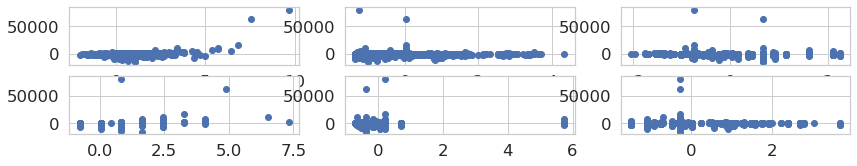

In [116]:
plt.figure(figsize=(14,10))
for i in range(len(num_feats)):
    plt.subplot(8,3,i+1)
    plt.scatter(X_valid_pp[:,i], resids2)

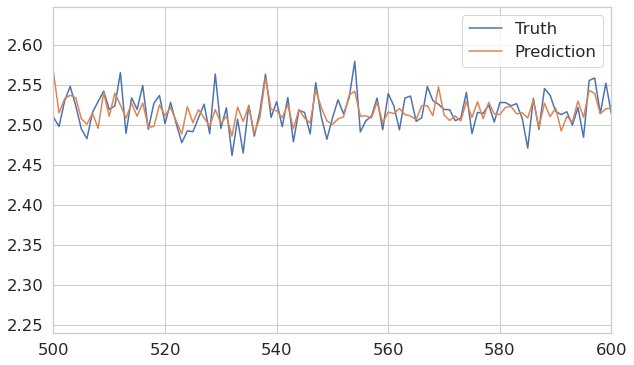

In [117]:
plt.figure(figsize=(10,6))
plt.plot(actuals, label='Truth')
plt.plot(preds, label='Prediction')
# plt.ylim([0,15000])
plt.xlim(np.array([0,100])+500)
plt.legend()

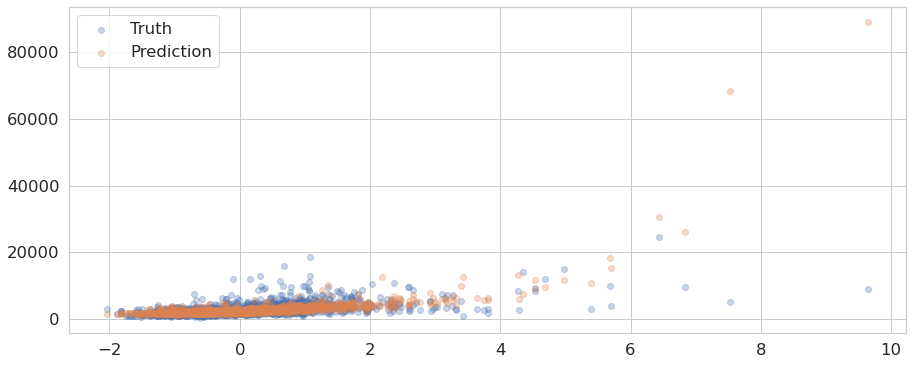

In [118]:
column = 0
alpha=0.3
plt.figure(figsize=(15,6))
x=X_valid_pp[:,column]
plt.scatter(x, actuals2, label='Truth', alpha=alpha)
plt.scatter(x, preds2, label='Prediction', alpha=alpha)
# plt.ylim([0,8000])
# plt.xlim([0,100])
plt.legend()

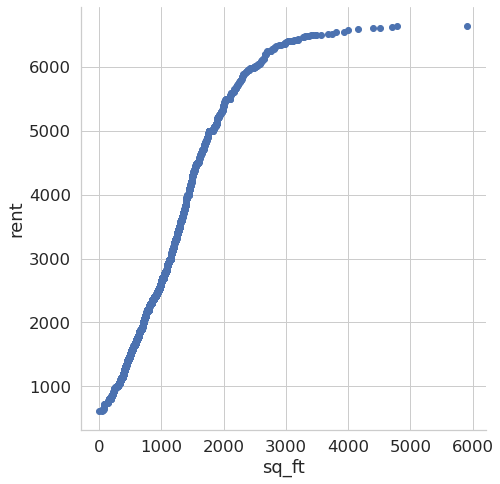

In [119]:
from seaborn_qqplot import pplot

pplot(data, x='sq_ft', y=target,kind='qq', height=7)
# plt.figure(figsize=(15,6))
# plt.scatter(data['ft'],data['log_rent'], alpha=0.2, s=5)

In [120]:
# sns.jointplot(x=data['pets_allowed'], y=data['log_rent'])

In [121]:
print(len(feats))
print(len(lm.coef_))

6
6


In [122]:
print(lm.coef_)

[ 0.01051994 -0.00298209  0.00338794  0.00483071  0.0038136  -0.00469334]


In [123]:
for i, c in enumerate(lm.coef_[1:]):
    print(feats[i], ': ', c)

sq_ft :  -0.0029820926257610614
build_age :  0.003387939049081842
med_hh_income :  0.00483071157823737
baths :  0.0038135967195534705
density :  -0.004693335833956776


In [124]:
10**0.09

1.2302687708123816

In [125]:
scaler.var_

array([2.05789638e+05, 5.46648831e+02, 4.34624854e+08, 3.81877933e-01,
       7.09003775e+06, 7.89281560e+01])

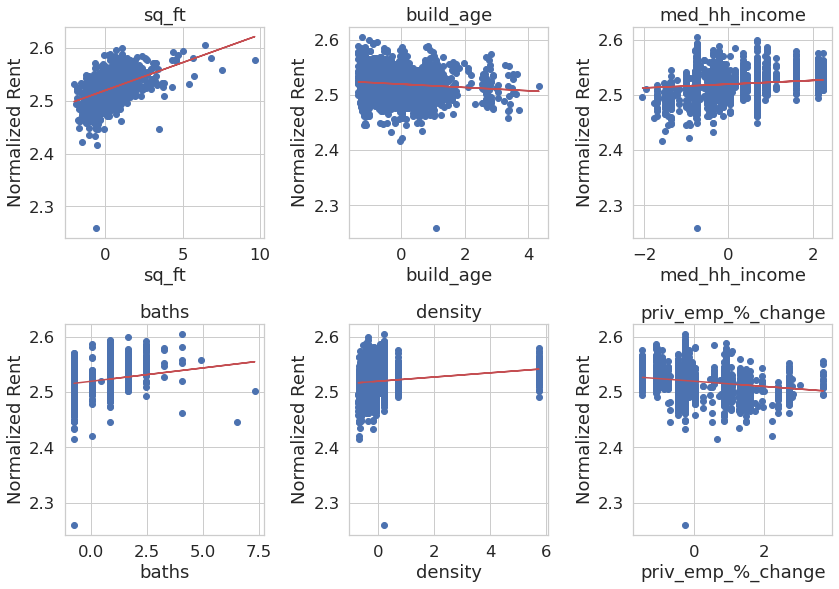

In [126]:
plt.figure(figsize=(12,12))
def reverse_box_cox(x, lamb=lamb):
    return (lamb*x+1)**(1/x)

for i in range(len(lm.coef_)):
    plt.subplot(3,3,i+1)
    plt.scatter(np.array(X_valid_pp)[:,i], y_valid_bc)
    plt.plot(np.array(X_valid_pp[:, i]), (lm.coef_[i]*X_valid_pp[:, i]+lm.intercept_), c='r')
    plt.title(feats[i])
    plt.tight_layout()
    plt.xlabel(feats[i])
    plt.ylabel('Normalized Rent')
# plt.savefig('lm_best_fits.png', dpi=300)

In [127]:
print(X_valid_pp)

[[-0.76839294  0.48597776  2.11480783 -0.77596103 -0.18904664 -1.48480691]
 [ 0.26766993  0.01550068 -0.7499264   0.84225955  0.20100673 -0.28041508]
 [ 1.95402756  0.01550068 -1.95811965  0.84225955 -0.68876263  0.94648874]
 ...
 [-0.93372212  0.82814291 -0.7499264  -0.77596103  0.20100673 -0.28041508]
 [-0.69344371 -1.31038928  2.11480783 -0.77596103 -0.18904664 -1.48480691]
 [ 0.81215403  0.01550068 -0.4593422   0.84225955 -0.52881296  1.30668069]]


In [128]:
print(lm.predict(X_valid_pp))

[2.5196686  2.52591743 2.53041303 ... 2.50303832 2.52581399 2.52239784]


In [129]:
print(reverse_box_cox(lm.predict(X_valid_pp)))

[0.31558941 0.31104946 0.30768764 ... 0.32699179 0.31112584 0.31362497]


In [130]:
lm.score(X_valid_pp, y_valid_bc)

0.4427682455133116

In [131]:
lm.predict(X_test_pp)

array([2.5310307 , 2.5036065 , 2.53764   , ..., 2.50739806, 2.52901314,
       2.50319436])

In [132]:
y_test_bc

array([[2.54749114],
       [2.49981905],
       [2.54290421],
       ...,
       [2.49389854],
       [2.52695085],
       [2.49376946]])